In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
"""
SELECT
  pass_score,
  gender,
  extract(YEAR FROM birthday),
  last_used_platform                           AS platform,
  CASE WHEN gender = 1
    THEN
      (SELECT count(*)
       FROM matchings
       WHERE male_id = users.id AND male_ok_date IS NOT NULL AND female_ok_date IS NOT NULL)
  ELSE
    (SELECT count(*)
     FROM matchings
     WHERE female_id = users.id AND male_ok_date IS NOT NULL AND female_ok_date IS NOT NULL)
  END
                                               AS matching,

  (SELECT count(*)
   FROM cards
   WHERE card_type = 0 AND user_id = users.id) AS liked,

  (SELECT count(*)
   FROM cards
   WHERE card_type = 1 AND user_id = users.id) AS like,

  (SELECT count(*)
   FROM cards
   WHERE card_type = 2 AND user_id = users.id) AS give_high_score,

  (SELECT count(*)
   FROM cards
   WHERE card_type = 4 AND user_id = users.id) AS given_high_score
FROM users
WHERE screen_status = 4 AND pass_score IS NOT NULL AND gender IS NOT NULL AND height IS NOT NULL;
"""
df = pd.read_csv('data/matching.csv')
males = df[df['gender'] == 1]
females = df[df['gender'] == 2]

(3, 5)

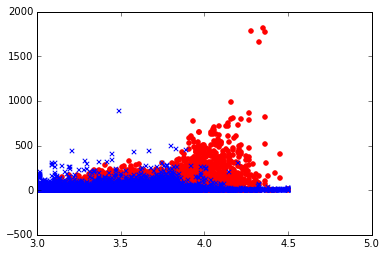

In [36]:
plt.scatter(females['pass_score'], females['liked'], marker='o', color='red')
plt.scatter(males['pass_score'], males['matching'], marker='x', color='blue')

# plt.ylim(3, 5)
plt.xlim(3, 5)
